In [2]:
# CARGA DE DATASET Y LIBRERÍAS
import pandas as pd

df = pd.read_csv('/content/sample_data/Datos_abiertos_cepre.csv')
df.head(6)

,IDHASH,COLEGIO,COLEGIO_DEPA,COLEGIO_PROV,COLEGIO_DIST,COLEGIO_PAIS,COLEGIO_ANIO_EGRESO,ESPECIALIDAD,ANIO_POSTULA,CICLO_POSTULA,...,ANIO_NACIMIENTO,NACIMIENTO_PAIS,NACIMIENTO_DEPA,NACIMIENTO_PROV,NACIMIENTO_DIST,SEXO,CALIF_FINAL,INGRESO,MODO_INGRESO,FECHA_CORTE
0,54CB3EB25FC93C1FAC691E2351D8E561EA7A5C1CC0C840...,Corazón de Jesús,CALLAO,CALLAO,CALLAO,PERU,2013,SIN ESPECIALIDAD,2016,2,...,1997,Peru,CALLAO,CALLAO,CALLAO,MASCULINO,4.491,NO,SIN INGRESO,20240529
1,5A18BE74478BB8BAA3D1E1B0830AF43D883E55471BEC50...,Aurelio miro quesada sosa,LIMA,LIMA,LA MOLINA,PERU,2013,SIN ESPECIALIDAD,2016,2,...,1997,Peru,LIMA,LIMA,LIMA,FEMENINO,2.045,NO,SIN INGRESO,20240529
2,5BF8EBFFA46ED932AE6135BD683BB792AC8E4B9C068DAD...,Daniel Alomia Robles,LIMA,LIMA,SAN JUAN DE LURIGANCHO,PERU,2015,SIN ESPECIALIDAD,2016,2,...,2000,Peru,LIMA,LIMA,INDEPENDENCIA,MASCULINO,0.642,NO,SIN INGRESO,20240529
3,3CCEB93417E4F004B107B6389797B7948BA7F051FCB405...,alfonso ugarte,LIMA,LIMA,LURIGANCHO,PERU,2015,SIN ESPECIALIDAD,2016,2,...,1999,Peru,LIMA,LIMA,SAN JUAN DE LURIGANCHO,FEMENINO,0.535,NO,SIN INGRESO,20240529
4,909D65D35B90A659D366B3F8B2C467594E550452ACBA6C...,pamer,LIMA,LIMA,PUENTE PIEDRA,PERU,2015,SIN ESPECIALIDAD,2016,2,...,1999,Peru,LIMA,LIMA,PUENTE PIEDRA,MASCULINO,0.591,NO,SIN INGRESO,20240529
5,3566BB55D095ABB6EA4F0FFE2B5754848ADE1FE3B4F69F...,2095,LIMA,LIMA,LOS OLIVOS,PERU,2014,SIN ESPECIALIDAD,2016,2,...,1997,Peru,LIMA,LIMA,LIMA,FEMENINO,0.369,NO,SIN INGRESO,20240529


In [3]:
# AGREGAR COLUMNA 'CICLO' PARA CONSIDERAR EL DATO EN UNA SOLA COLUMNA
df['CICLO'] = df[['ANIO_POSTULA', 'CICLO_POSTULA']].astype(str).agg('-'.join, axis=1)
df['CICLO']

,CICLO
0,2016-2
1,2016-2
2,2016-2
3,2016-2
4,2016-2
...,...
33804,2023-2
33805,2023-2
33806,2023-2
33807,2023-2


In [4]:
# REASIGNAMOS EL NOMBRE DE LA COLUMNA 'IDHASH' POR EL DE 'ALUMNOS' Y VALIDAMOS LA INFORMACIÓN DEL DF CON LA ACTUALIZACIÓN HASTA EL MOMENTO
df.rename(columns={'IDHASH': 'ALUMNOS'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33809 entries, 0 to 33808
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALUMNOS              33809 non-null  object 
 1   COLEGIO              33809 non-null  object 
 2   COLEGIO_DEPA         33809 non-null  object 
 3   COLEGIO_PROV         33809 non-null  object 
 4   COLEGIO_DIST         33809 non-null  object 
 5   COLEGIO_PAIS         33809 non-null  object 
 6   COLEGIO_ANIO_EGRESO  33809 non-null  int64  
 7   ESPECIALIDAD         33809 non-null  object 
 8   ANIO_POSTULA         33809 non-null  int64  
 9   CICLO_POSTULA        33809 non-null  int64  
 10  DOMICILIO_DEPA       33809 non-null  object 
 11  DOMICILIO_PROV       33809 non-null  object 
 12  DOMICILIO_DIST       33809 non-null  object 
 13  ANIO_NACIMIENTO      33809 non-null  int64  
 14  NACIMIENTO_PAIS      33809 non-null  object 
 15  NACIMIENTO_DEPA      33809 non-null 

In [5]:
# CONTABILIZAR ALUMNOS MATRICULADOS POR CICLO
gdf = df.groupby('CICLO')[['ALUMNOS']].count()
gdf

,ALUMNOS
CICLO,
2016-2,2274
2017-1,2077
2017-2,2240
2018-1,2141
2018-2,2567
2019-1,2608
2019-2,2742
2020-1,2731
2021-1,2980


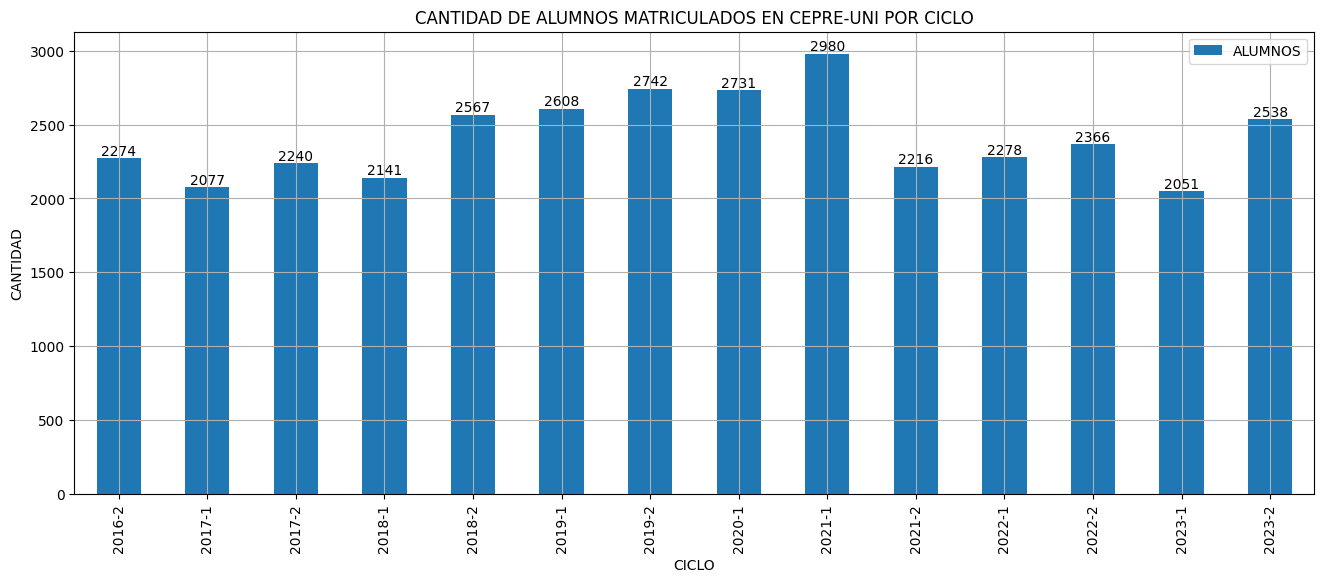

In [6]:
# GRAFICAMOS EL DF RESULTADO
ax_gdf=gdf.plot(kind='bar',figsize=(16,6),xlabel='CICLO',ylabel='CANTIDAD',title='CANTIDAD DE ALUMNOS MATRICULADOS EN CEPRE-UNI POR CICLO',grid=True)
for container in ax_gdf.containers:
    ax_gdf.bar_label(container)

In [7]:
# CONTABILIZAR ALUMNOS MATRICULADOS POR CICLO
conteo_sexo_matriculado = df.groupby('CICLO')[['SEXO']].value_counts().unstack(fill_value=0)

# CALCULAR PORCENTAJES
porcentajes_sexo_matriculado = (conteo_sexo_matriculado.div(conteo_sexo_matriculado.sum(axis=1), axis=0) * 100).round(2)

# CONCATENER AMBOS DF (CONTEO Y PORCENTAJE)
sm_df = pd.concat([conteo_sexo_matriculado, porcentajes_sexo_matriculado], axis=1, keys=['Conteo Matriculado', 'Porcentaje Matriculado'])

prom_sm = porcentajes_sexo_matriculado.mean()

sm_df

Conteo Matriculado           Porcentaje Matriculado          
SEXO             FEMENINO MASCULINO               FEMENINO MASCULINO
CICLO                                                               
2016-2                529      1745                  23.26     76.74
2017-1                519      1558                  24.99     75.01
2017-2                599      1641                  26.74     73.26
2018-1                567      1574                  26.48     73.52
2018-2                636      1931                  24.78     75.22
2019-1                687      1921                  26.34     73.66
2019-2                703      2039                  25.64     74.36
2020-1                730      2001                  26.73     73.27
2021-1                734      2246                  24.63     75.37
2021-2                558      1658                  25.18     74.82
2022-1                576      1702                  25.29     74.71
2022-2                595      1771                  25.15     74.85
2023-1                486      1565                  23.70     76.30
2023-2                595      1943                  23.44     76.56

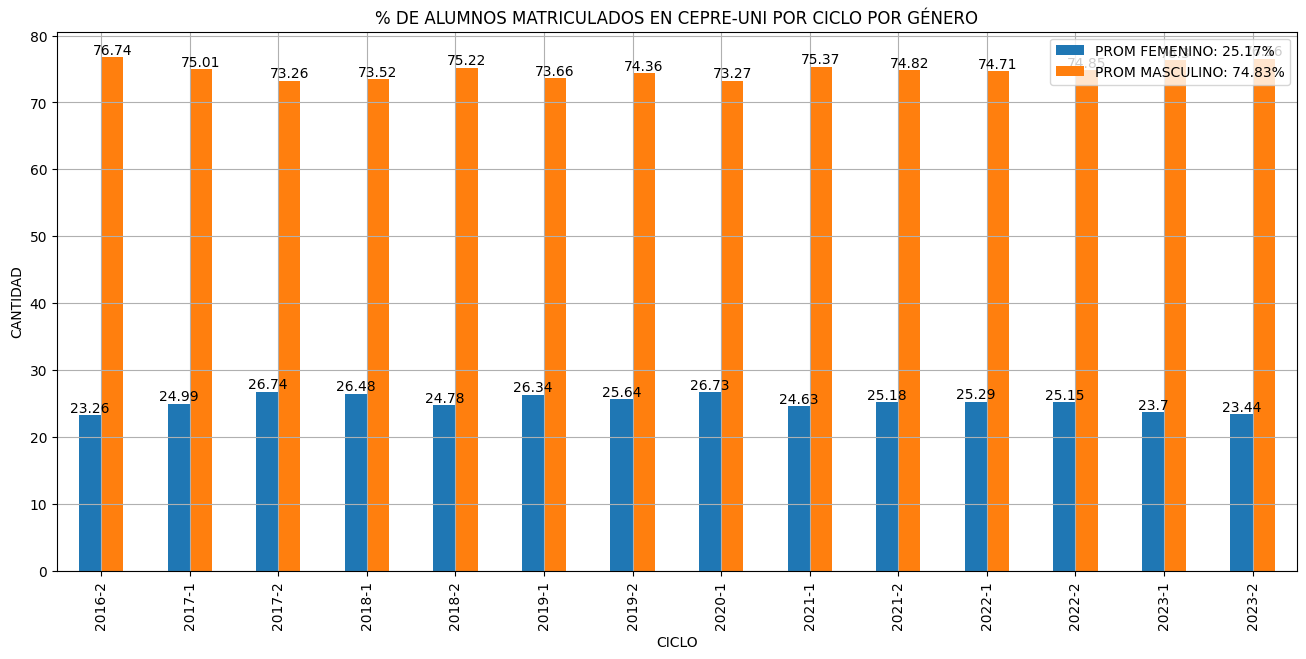

In [8]:
# GRAFICAMOS EL DF RESULTADO CONSIDERANDO EL % DE MATRICULADOS
ax_sm_df=sm_df['Porcentaje Matriculado'].plot(kind='bar',figsize=(16,7),xlabel='CICLO',ylabel='CANTIDAD',title='% DE ALUMNOS MATRICULADOS EN CEPRE-UNI POR CICLO POR GÉNERO',grid=True)
prom_sm_f = str((prom_sm.loc['FEMENINO']).round(2))
prom_sm_m = str((prom_sm.loc['MASCULINO']).round(2))
ax_sm_df.legend(['PROM FEMENINO: ' + prom_sm_f + '%', 'PROM MASCULINO: ' + prom_sm_m + '%'])
for container in ax_sm_df.containers:
    ax_sm_df.bar_label(container)

In [9]:
# CONTABILIZAR ALUMNOS INGRESANTES POR  POR PERIODO ACADÉMICO
conteo_sexo_ingresante = df[(df['INGRESO']=='SI') & (df['MODO_INGRESO']=='DIRECTO')].groupby('CICLO')[['SEXO']].value_counts().unstack(fill_value=0)

# CALCULAR PORCENTAJES EN BASE AL TOTAL DE INGRESANTES
porcentajes_sexo_ingresante = (conteo_sexo_ingresante.div(conteo_sexo_ingresante.sum(axis=1), axis=0) * 100).round(2)

# CONCATENER AMBOS DF (CONTEO Y PORCENTAJE)
si_df = pd.concat([conteo_sexo_ingresante, porcentajes_sexo_ingresante], axis=1, keys=['Conteo Ingresante', 'Porcentaje Ingresante'])

prom_si = porcentajes_sexo_ingresante.mean()

si_df

Conteo Ingresante           Porcentaje Ingresante          
SEXO            FEMENINO MASCULINO              FEMENINO MASCULINO
CICLO                                                             
2016-2                38       216                 14.96     85.04
2017-1                61       214                 22.18     77.82
2017-2                60       208                 22.39     77.61
2018-1                63       190                 24.90     75.10
2018-2                44       197                 18.26     81.74
2019-1                50       220                 18.52     81.48
2019-2                56       212                 20.90     79.10
2020-1                40       210                 16.00     84.00
2021-1                33       192                 14.67     85.33
2021-2                30       171                 14.93     85.07
2022-1                44       226                 16.30     83.70
2022-2                49       197                 19.92     80.08
2023-1                41       216                 15.95     84.05
2023-2                45       243                 15.62     84.38

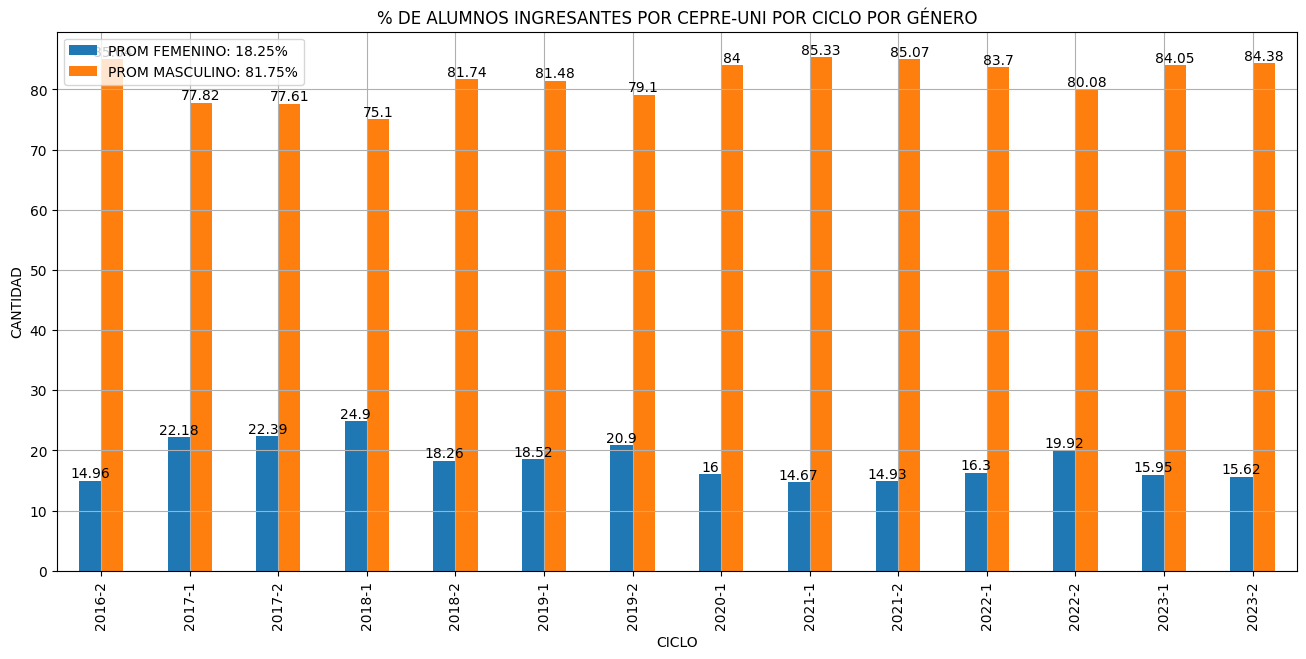

In [10]:
# GRAFICAMOS EL DF RESULTADO CONSIDERANDO EL % DE INGRESANTES
ax_si_df=si_df['Porcentaje Ingresante'].plot(kind='bar',figsize=(16,7),xlabel='CICLO',ylabel='CANTIDAD',title='% DE ALUMNOS INGRESANTES POR CEPRE-UNI POR CICLO POR GÉNERO',grid=True)
prom_si_f = str((prom_si.loc['FEMENINO']).round(2))
prom_si_m = str((prom_si.loc['MASCULINO']).round(2))
ax_si_df.legend(['PROM FEMENINO: ' + prom_si_f + '%', 'PROM MASCULINO: ' + prom_si_m + '%'])
for container in ax_si_df.containers:
    ax_si_df.bar_label(container)

In [11]:
# EN EL SIGUIENTE ANÁLISIS SE EVALÚA EL % DE INGRESANTES POR GÉNERO EN BASE AL TOTAL DE MATRICULADOS

# CONCATENER AMBOS DF (CONTEO Y PORCENTAJE)
scmi_df = pd.concat([conteo_sexo_matriculado, conteo_sexo_ingresante], axis=1, keys=['Conteo Matriculado', 'Conteo Ingresante'])

scmi_df

Conteo Matriculado           Conteo Ingresante          
SEXO             FEMENINO MASCULINO          FEMENINO MASCULINO
CICLO                                                          
2016-2                529      1745                38       216
2017-1                519      1558                61       214
2017-2                599      1641                60       208
2018-1                567      1574                63       190
2018-2                636      1931                44       197
2019-1                687      1921                50       220
2019-2                703      2039                56       212
2020-1                730      2001                40       210
2021-1                734      2246                33       192
2021-2                558      1658                30       171
2022-1                576      1702                44       226
2022-2                595      1771                49       197
2023-1                486      1565                41       216
2023-2                595      1943                45       243

In [12]:
# CALCULAR TASAS
tasa_i_f = ((scmi_df['Conteo Ingresante', 'FEMENINO']/scmi_df['Conteo Matriculado', 'FEMENINO']) * 100).round(2)
tasa_i_m = ((scmi_df['Conteo Ingresante', 'MASCULINO']/scmi_df['Conteo Matriculado', 'MASCULINO']) * 100).round(2)

resultado_ti = pd.concat([conteo_sexo_matriculado, conteo_sexo_ingresante, tasa_i_f, tasa_i_m], axis=1, keys=['Conteo Matriculado', 'Conteo Ingresante', 'Tasa Ingresante F', 'Tasa Ingresante M'])

prom_ti = resultado_ti[['Tasa Ingresante F','Tasa Ingresante M']].mean()

resultado_ti

Conteo Matriculado           Conteo Ingresante            \
                 FEMENINO MASCULINO          FEMENINO MASCULINO   
CICLO                                                             
2016-2                529      1745                38       216   
2017-1                519      1558                61       214   
2017-2                599      1641                60       208   
2018-1                567      1574                63       190   
2018-2                636      1931                44       197   
2019-1                687      1921                50       220   
2019-2                703      2039                56       212   
2020-1                730      2001                40       210   
2021-1                734      2246                33       192   
2021-2                558      1658                30       171   
2022-1                576      1702                44       226   
2022-2                595      1771                49       197   
2023-1                486      1565                41       216   
2023-2                595      1943                45       243   

       Tasa Ingresante F Tasa Ingresante M  
                       0                 1  
CICLO                                       
2016-2              7.18             12.38  
2017-1             11.75             13.74  
2017-2             10.02             12.68  
2018-1             11.11             12.07  
2018-2              6.92             10.20  
2019-1              7.28             11.45  
2019-2              7.97             10.40  
2020-1              5.48             10.49  
2021-1              4.50              8.55  
2021-2              5.38             10.31  
2022-1              7.64             13.28  
2022-2              8.24             11.12  
2023-1              8.44             13.80  
2023-2              7.56             12.51

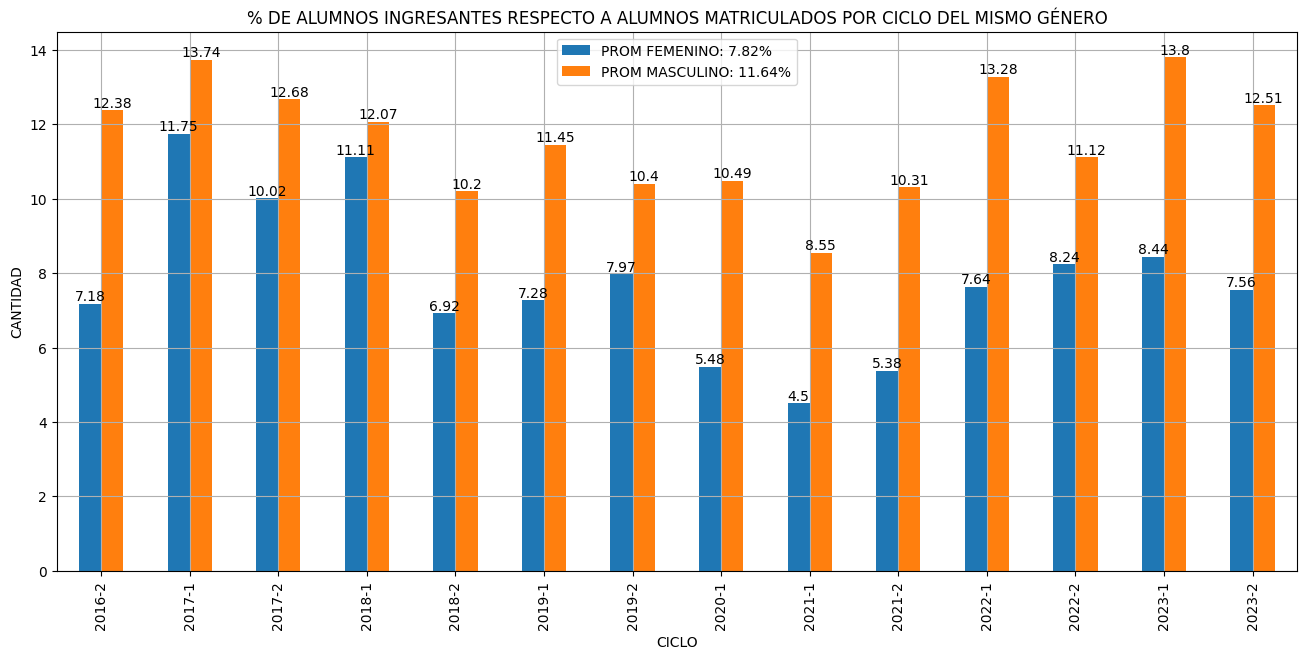

In [13]:
# GRAFICAMOS EL DF RESULTADO CONSIDERANDO LA TASA DE INGRESANTES POR GÉNERO
ax_ti_df=resultado_ti[['Tasa Ingresante F','Tasa Ingresante M']].plot(kind='bar',figsize=(16,7),xlabel='CICLO',ylabel='CANTIDAD',title='% DE ALUMNOS INGRESANTES RESPECTO A ALUMNOS MATRICULADOS POR CICLO DEL MISMO GÉNERO',grid=True)
prom_ti_f = str((prom_ti.loc['Tasa Ingresante F', 0]).round(2))
prom_ti_m = str((prom_ti.loc['Tasa Ingresante M', 1]).round(2))
ax_ti_df.legend(['PROM FEMENINO: ' + prom_ti_f + '%', 'PROM MASCULINO: ' + prom_ti_m + '%'])
for container in ax_ti_df.containers:
    ax_ti_df.bar_label(container)